In [1]:
#importing libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Installing to openpyxl to read excel files of all versions:
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable


In [3]:
#importing data
df=pd.read_excel('Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
#information about the data
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
#describe about the data
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
df.shape

(10683, 11)

Handling Missing Values

In [7]:
#finding the null values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
!pip install missingno

Defaulting to user installation because normal site-packages is not writeable


<function matplotlib.pyplot.show(close=None, block=None)>

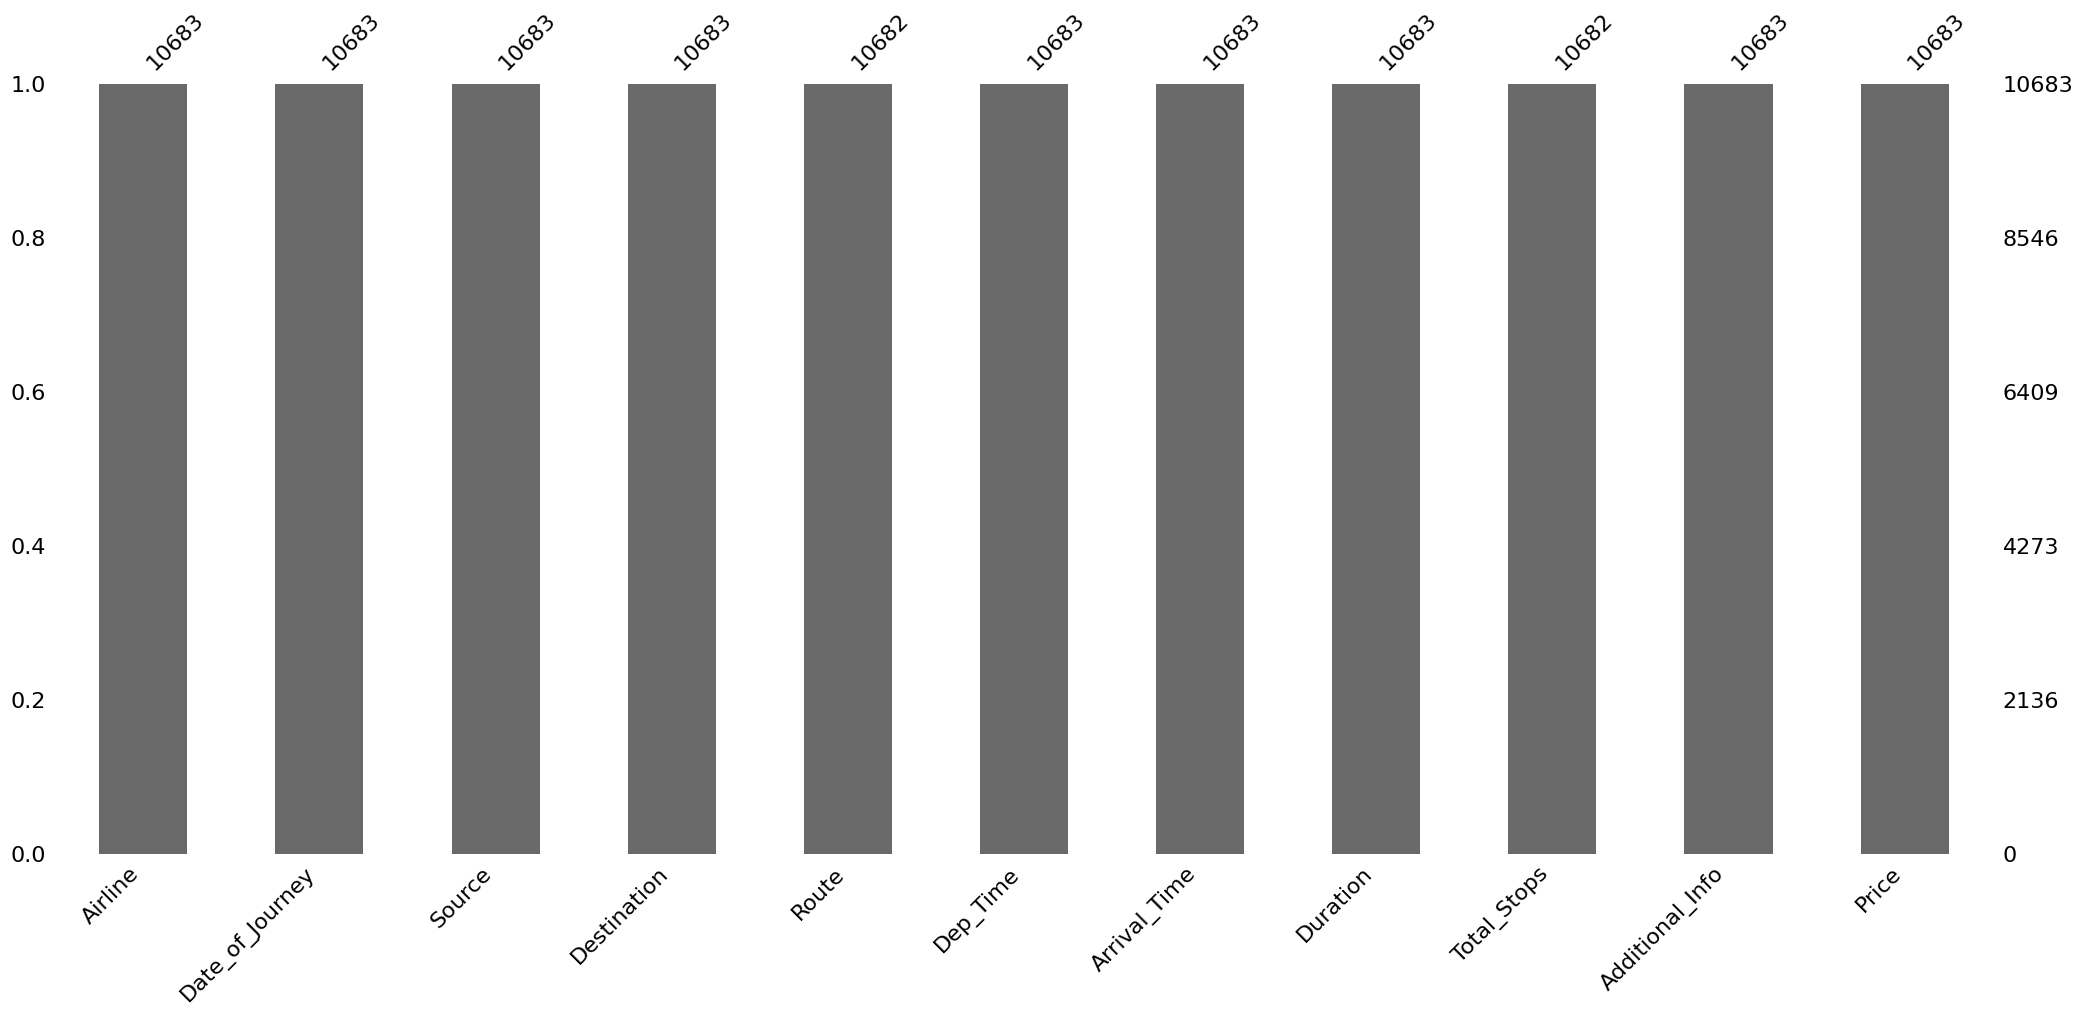

In [9]:
#Visual representation of NULL values:
import missingno as msno
msno.bar(df)
plt.show

<a id = '5.5'></a>
<p style = "font-size : 20px; color : #000000 ; font-family : 'Arial MT'; border-radius: 5px 5px;">There are Missing Values in TWO of the columns - Route, Total_Stops.</p>

* <a id = '5.5'></a>
<p style = "font-size : 20px; color : #000000 ; font-family : 'Arial MT'; border-radius: 5px 5px;">As there are very few NULL values in the dataset, their direct deletion would have negligible impact on our subsequent processing steps.</p>

In [10]:
#drop the nullvalues
df.dropna(inplace=True)

In [11]:
#Check again - to confirm whether deleted or not:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

* <a id = '5.5'></a>
<p style = "font-size : 20px; color : #000000 ; font-family : 'Arial MT'; border-radius: 5px 5px;">The NULL values are deleted/handlled.</p>

Data Preprocessing

In [12]:
#Check for datatypes of Columns - Make changes if required.
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

<a id = '5.5'></a>
<p style = "font-size : 20px; color : #000000 ; font-family : 'Arial MT'; border-radius: 5px 5px;">There are COLUMNS whose datatypes are not appropriate according its values. To ensure accurate predictions, we'll convert the data types of 'Date_of_journey', 'Arrival_Time', and 'Dep_Time' from object to date and time formats. This conversion will enable us to extract specific components such as day and month effectively:</p>

* <a id = '5.5'></a>
<p style = "font-size : 20px; color : #000000 ; font-family : 'Arial MT'; border-radius: 5px 5px;">Using dt.day allows us to extract the day component from the date.</p>
* <a id = '5.5'></a>
<p style = "font-size : 20px; color : #000000 ; font-family : 'Arial MT'; border-radius: 5px 5px;">Similarly, dt.month enables us to extract the month component from the date.</p>

In [13]:
#Create a function to change the datatype to its appropriate type:
def change_into_datetime(col):
    df[col]=pd.to_datetime(df[col])

In [14]:
#List of Columns:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [15]:
#Iterate through all the columns for changing thier dataypes using the above function:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [16]:
#Check for datatypes of columns again:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

* <p style = "font-size : 20px; color : #000000 ; font-family : 'Arial MT'; border-radius: 5px 5px;">After extracting the day and month from the 'Date_of_Journey' column and storing them in two separate columns, the original 'Date_of_Journey' column becomes redundant and can be dropped.</p>
 

In [17]:
df['journey_day']=df['Date_of_Journey'].dt.day
df['journey_month']=df['Date_of_Journey'].dt.month

In [18]:
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-02-27 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-02-27 05:50:00,2024-02-27 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2024-02-27 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2024-02-27 18:05:00,2024-02-27 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2024-02-27 16:50:00,2024-02-27 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [19]:
#Drop the Date_of_Journey column:
df.drop('Date_of_Journey', axis=1, inplace=True)

* <p style = "font-size : 20px; color : #000000 ; font-family : 'Arial MT'; border-radius: 5px 5px;">We'll extract the hour and minute information from both the 'Arrival_Time' and 'Dep_Time' features and create new columns for each. Once this information is extracted, the original 'Arrival_Time' and 'Dep_Time' columns can be dropped to maintain data clarity and reduce redundancy.</p>
 



In [20]:
# function for extracting hour and minutes
def extract_hour(data,col):
    data[col+'_hour']=data[col].dt.hour
    
def extract_min(data,col):
    data[col+'_min']=data[col].dt.minute

def drop_col(data,col):
    data.drop(col,axis=1,inplace=True)

In [21]:
# call the function
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time
extract_hour(df,'Dep_Time')

#extracting minutes
extract_min(df,'Dep_Time')

#drop the column
drop_col(df,'Dep_Time')

In [22]:
#extracting hour
extract_hour(df,'Arrival_Time')

#extracting min
extract_min(df,'Arrival_Time')

#drop the column
drop_col(df,'Arrival_Time')

In [23]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


* <p style = "font-size : 20px; color : #000000 ; font-family : 'Arial MT'; border-radius: 5px 5px;">We'll perform preprocessing on the 'Duration' column by separating the duration into hours and minutes. This involves extracting the hour and minute components from the duration and storing them in new columns.</p>

In [24]:
duration=list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]: # Check if duration contains only hour
             duration[i]=duration[i] + ' 0m' # Adds 0 minute
        else:
             duration[i]='0h '+ duration[i] # Adsds 0 hours

In [25]:
#Store list values it into the original column:
df['Duration']=duration

In [26]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [27]:
#Extract Hour and Minutes from the Duration Column:
def hour(x):
    return x.split(' ')[0][0:-1]

def minutes(x):
    return x.split(' ')[1][0:-1]

In [28]:
#Apply those Functions on the Duration Column:
df['dur_hour']=df['Duration'].apply(hour)

In [29]:
df['dur_min']=df['Duration'].apply(minutes)

In [30]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [31]:
#This is the Column which we created above. Drop the Duration Column.
drop_col(df,'Duration')

In [32]:
df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
journey_day           int64
journey_month         int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
dur_hour             object
dur_min              object
dtype: object

* <p style = "font-size : 20px; color : #000000 ; font-family : 'Arial MT'; border-radius: 5px 5px;">All columns have been appropriately assigned their respective data types, except for 'dur_hour' and 'dur_min'. To ensure consistency and compatibility with the dataset, we'll proceed by typecasting these columns accordingly.</p>

In [33]:
#Typecast the Columns:
df['dur_hour'] = df['dur_hour'].astype(int)
df['dur_min'] = df['dur_min'].astype(int)

In [34]:
df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
journey_day           int64
journey_month         int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
dur_hour              int32
dur_min               int32
dtype: object

Handling Categorical Columns

In [35]:
#Check for Object Datatype (Categorical Columns) and store it in a seperate list for easy processing:
column=[column for column in df.columns if df[column].dtype=='object']
column

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [36]:
# Seperate the continuous columns into seperate list:
continuous_col =[column for column in df.columns if df[column].dtype!='object']
continuous_col

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_min',
 'Arrival_Time_hour',
 'Arrival_Time_min',
 'dur_hour',
 'dur_min']

<p style = "font-size : 20px; color : #000000 ; font-family : 'Arial MT'; border-radius: 5px 5px;">We employ two primary encoding techniques to convert categorical data into numerical formats:</p>

* <p style = "font-size : 20px; color : #000000 ; font-family : 'Arial MT'; border-radius: 5px 5px;">For nominal data, which lacks any inherent order, we utilize one-hot encoding.</p>
* <p style = "font-size : 20px; color : #000000 ; font-family : 'Arial MT'; border-radius: 5px 5px;">On the other hand, for ordinal data that possess a defined order, we opt for label encoding.</p>

In [37]:
#Create a DataFrame Called Categirical with only Categorical Columns:
categorical = df[column]

In [38]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


Handle Airline Column

In [39]:
#Check for Unique Catergories in the Airline Column:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [40]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline=pd.get_dummies(categorical['Airline'],drop_first=True)

In [41]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


Handle Source Column

In [42]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [43]:
#encoding of source column
source=pd.get_dummies(categorical['Source'],drop_first=True)
source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


Handle Destination Column

In [44]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [45]:
#encoding of destination column
destination=pd.get_dummies(categorical['Destination'],drop_first=True)
destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


Handle Route Column

In [46]:
# now work on route column
categorical['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [47]:
categorical['Route1']=categorical['Route'].str.split('→').str[0]
categorical['Route2']=categorical['Route'].str.split('→').str[1]
categorical['Route3']=categorical['Route'].str.split('→').str[2]
categorical['Route4']=categorical['Route'].str.split('→').str[3]
categorical['Route5']=categorical['Route'].str.split('→').str[4]

In [48]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [49]:
#Drop the route column:
drop_col(categorical,'Route')

In [50]:
#Check for missing values, as we have splitted Route Column. there might be few routes which will have null values:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route1                 0
Route2                 0
Route3              3491
Route4              9116
Route5             10636
dtype: int64

In [51]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route1', 'Route2', 'Route3', 'Route4', 'Route5'],
      dtype='object')

In [52]:
#Handle the Null values - here we will replace them with None:
for i in ['Route3', 'Route4', 'Route5']:
    categorical[i].fillna('None',inplace=True)

In [53]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route1             0
Route2             0
Route3             0
Route4             0
Route5             0
dtype: int64

Handle All Route Columns

In [54]:
# Applying label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [55]:
for i in ['Route1', 'Route2', 'Route3', 'Route4', 'Route5']:
    categorical[i]=encoder.fit_transform(categorical[i])

In [56]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [57]:
#Drop this column as whole column have the same value:
drop_col(categorical,'Additional_Info')

Handle Total_Stops Column

In [58]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [59]:
# encoding Total stops
dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

In [60]:
categorical['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [61]:
#Drop Unwanted Columns:
drop_col(categorical,'Source')
drop_col(categorical,'Destination')
drop_col(categorical,'Airline')

The Data is Cleaned Now

In [62]:
#Merge All the Sub-datasets we created for cleaning the columns into one final dataframe:
final_df=pd.concat([categorical,Airline,source,destination,df[continuous_col]],axis=1)

In [63]:
final_df.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,0,0,13,29,13,5,0,0,1,0,...,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,...,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,...,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,...,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,...,1,13302,3,1,16,50,21,35,4,45


Check and Handle Outliers (If Any)

In [64]:
def plot(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[col],ax=ax1)
    sns.boxplot(data[col],ax=ax2)

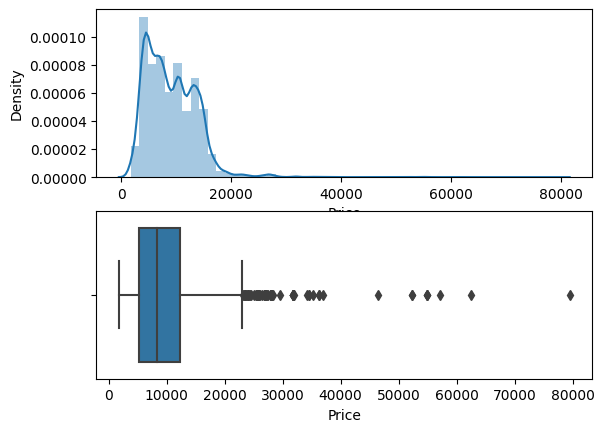

In [65]:
plot(final_df,'Price')

<strong><p style = "font-size : 20px; color : #000000 ; font-family : 'Arial MT'; border-radius: 5px 5px;">Replacing Outliers with Median:</p></strong>

* <p style = "font-size : 20px; color : #000000 ; font-family : 'Arial MT'; border-radius: 5px 5px;">To address outliers in the price feature, we opt for replacing them with the median value. This strategy ensures robustness in data preprocessing, maintaining model stability and accuracy.</p>

In [66]:
final_df['Price']=np.where(final_df['Price']>=40000,final_df['Price'].median(),final_df['Price'])

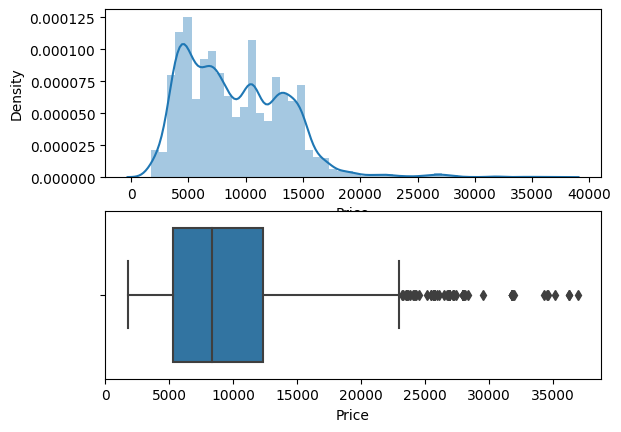

In [67]:
plot(final_df,'Price')

Split the Dataset into X (Independent) and y (Dependent)

In [68]:
X=final_df.drop('Price',axis=1)
y=df['Price']

Feature Selection

We want to choose the most useful features that relate well to the independent variable. To do this without making things too complicated, we use something called mutual_info_classif. It helps us find the important features while also making sure we don't end up with too many, which could slow things down.



In [69]:
from sklearn.feature_selection import mutual_info_classif

In [70]:
mutual_info_classif(X,y)

array([1.91799934, 2.30821453, 3.00497143, 2.54671061, 1.67082134,
       1.42804773, 0.69939526, 0.09576398, 0.63155112, 0.85920715,
       0.        , 0.52241853, 0.01393216, 0.31923535, 0.        ,
       0.22082203, 0.        , 0.16242391, 1.36460558, 0.80767762,
       0.28885313, 1.32711906, 0.39041655, 0.28565525, 0.18133478,
       0.33967085, 1.22910984, 1.0459714 , 1.51530871, 1.27212101,
       1.89422464, 1.62119916, 1.78093547, 1.13911654])

In [71]:
imp = pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp

,0
Total_Stops,1.909828
Route1,2.321512
Route2,3.000336
Route3,2.585400
Route4,1.722045
Route5,1.439302
Air India,0.669025
GoAir,0.101749
IndiGo,0.620469
Jet Airways,0.858448


In [72]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
Route2,3.000336
Route3,2.585400
Route1,2.321512
Total_Stops,1.909828
Arrival_Time_hour,1.901704
dur_hour,1.760316
Route4,1.722045
Arrival_Time_min,1.623711
Dep_Time_hour,1.494032
Route5,1.439302


* <p style = "font-size : 20px; color : #000000 ; font-family : 'Arial MT'; border-radius: 5px 5px;">Although some features in the table have values close to zero, suggesting insignificance, we're deferring their removal pending authorization. However, it's essential to acknowledge their presence and potential impact on our analysis.</p>

Model Building

In [73]:
# spiliting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=123)

In [74]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def predict(ml_model):
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(X_train,y_train)
    print("Training score: {}".format(model.score(X_train,y_train)))
    predictions = model.predict(X_test)
    print("Predictions are: {}".format(predictions))
    print('\n')
    r2score=r2_score(y_test,predictions) 
    print("r2 score is: {}".format(r2score))
          
    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))
     
    sns.distplot(y_test-predictions)      
          

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor


Random Forest Model

Model is: RandomForestRegressor()
Training score: 0.951370208164869
Predictions are: [ 8569.075      16898.42666667 13915.5345     ...  3861.12
  5574.34       10694.82464286]


r2 score is: 0.8425309835188626
MAE:1081.442664197291
MSE:3032172.6061599813
RMSE:1741.3134715380747


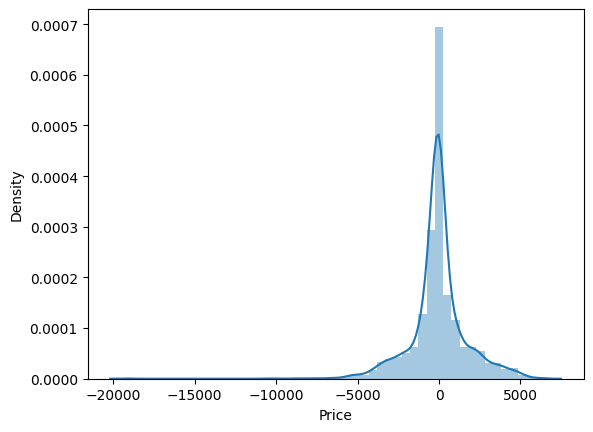

In [76]:
predict(RandomForestRegressor())

Gradient Boosting Model

Model is: GradientBoostingRegressor()
Training score: 0.8004872305794601
Predictions are: [ 5702.86974497 17826.76035345 12133.74946613 ...  4547.37535805
  6959.32889786 11428.58468176]


r2 score is: 0.8168066808138467
MAE:1397.4372379678573
MSE:3527511.4843580285
RMSE:1878.1670544331323


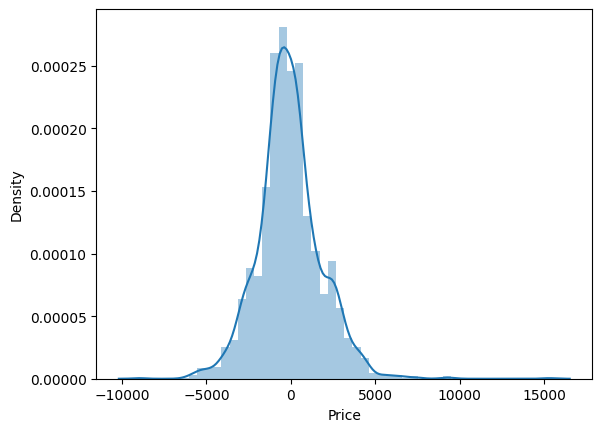

In [77]:
predict(GradientBoostingRegressor())